<a href="https://colab.research.google.com/github/ShathaMelhem/AI/blob/main/Employee_attrition_EDA1_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Impotring Libraries

In [152]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read Dataset

In [154]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("patelprashant/employee-attrition")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/employee-attrition


In [158]:
df = pd.read_csv('/kaggle/input/employee-attrition/WA_Fn-UseC_-HR-Employee-Attrition.csv')


# Discovering Dataset

In [159]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [160]:
df.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [162]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [163]:
# Total number of missing values of each column

df_null=df.isnull().sum()
df_null[df_null>0]
 # no nulls


,0


In [164]:
# Total number of missing values
df_null_sum=df.isnull().sum().sum()
print("Total missing values:", df_null_sum)
#no missing values

Total missing values: 0


In [165]:
percent=df.isnull().mean()*100
print(percent[percent>0])

Series([], dtype: float64)


In [166]:
duplicates=df.duplicated().sum()
print("Number of duplicates:", duplicates)

Number of duplicates: 0


In [167]:
df.shape

(1470, 35)

In [169]:
df.nunique()


,0
Age,43
Attrition,2
BusinessTravel,3
DailyRate,886
Department,3
DistanceFromHome,29
Education,5
EducationField,6
EmployeeCount,1
EmployeeNumber,1470


Exclude features with only one value for EmployeeCount, Over18, and StandardHours.



In [170]:
df.drop(columns=['EmployeeCount', 'Over18', 'StandardHours'], inplace=True)
df.shape

(1470, 32)

In [171]:
df['Attrition'].value_counts()

,count
Attrition,
No,1233
Yes,237


In [172]:
df['BusinessTravel'].value_counts()

,count
BusinessTravel,
Travel_Rarely,1043
Travel_Frequently,277
Non-Travel,150


In [173]:
df['Department'].value_counts()

,count
Department,
Research & Development,961
Sales,446
Human Resources,63


In [174]:
df['EducationField'].value_counts()

,count
EducationField,
Life Sciences,606
Medical,464
Marketing,159
Technical Degree,132
Other,82
Human Resources,27


In [175]:
df['Gender'].value_counts()

,count
Gender,
Male,882
Female,588


# Seperate Numerical and Categorical Data

In [176]:
cat_col=df.select_dtypes(include=['object'])
cat_col.columns


Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime'],
      dtype='object')

In [177]:
num_col=df.select_dtypes(include=['number'])
num_col.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

# EDA

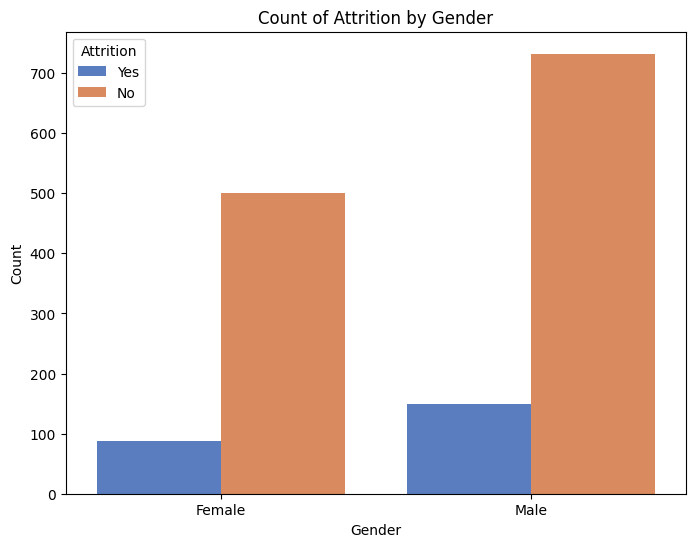

In [180]:
plt.figure(figsize=(8, 6))
# Use seaborn.countplot to directly count occurrences of 'Gender' for each 'Attrition' category
sns.countplot(data=df, x='Gender', hue='Attrition', palette='muted')
plt.title('Count of Attrition by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

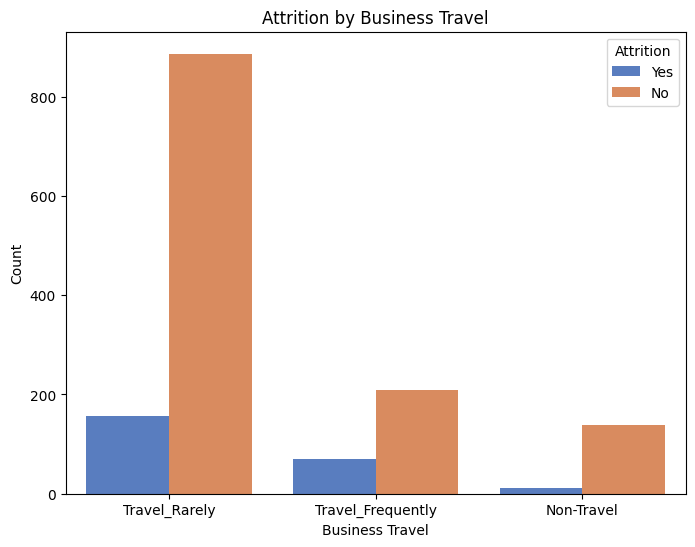

In [181]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='BusinessTravel', hue='Attrition', palette='muted')
plt.title('Attrition by Business Travel')
plt.xlabel('Business Travel')
plt.ylabel('Count')
plt.legend(title='Attrition', loc='upper right')
plt.show()

<ipython-input-184-162787661336>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Attrition', y='DistanceFromHome', palette='muted')


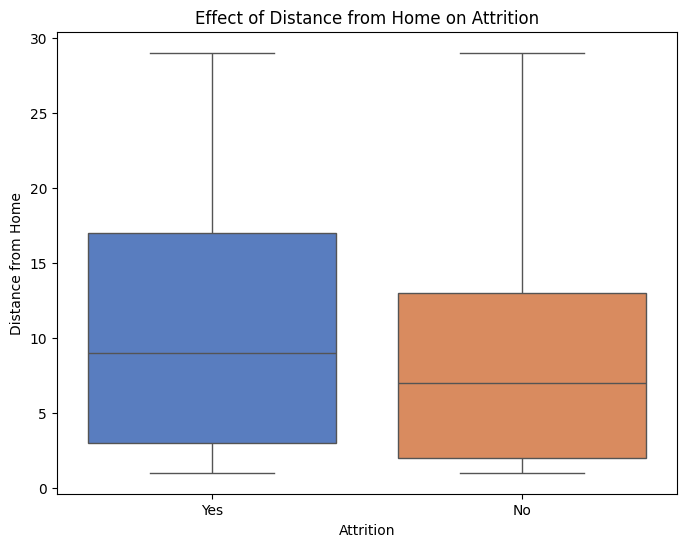

In [184]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Attrition', y='DistanceFromHome', palette='muted')
plt.title('Effect of Distance from Home on Attrition')
plt.xlabel('Attrition')
plt.ylabel('Distance from Home')
plt.show()

<Axes: xlabel='DistanceFromHome', ylabel='Density'>

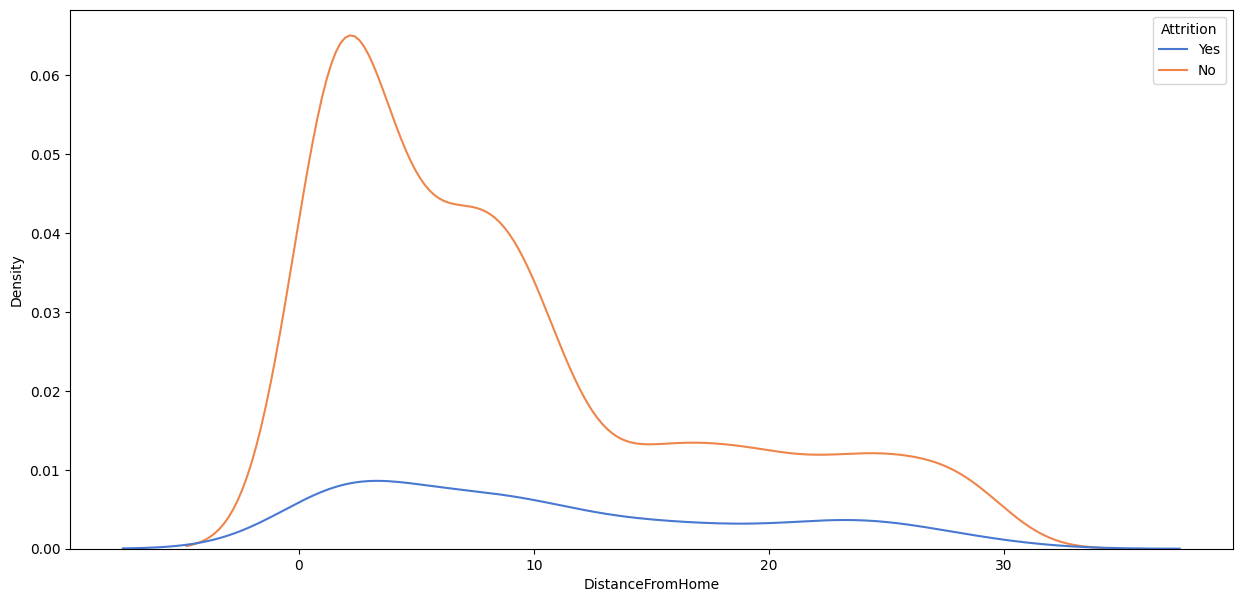

In [185]:
plt.figure(figsize=(15,7))
sns.kdeplot(data=df, x = "DistanceFromHome", hue="Attrition", palette='muted')

In [186]:
# Filter the DataFrame for employees with attrition
attrition_data = df[df['Attrition'] == 'Yes']

# Calculate the count of attritions per department
attrition_by_department = attrition_data['Department'].value_counts()

# Display the department with the most attritions
most_attritions_department = attrition_by_department.idxmax()
attritions_count = attrition_by_department.max()

print(f"The department with the most attritions is '{most_attritions_department}' with {attritions_count} attritions.")


The department with the most attritions is 'Research & Development' with 133 attritions.


<ipython-input-190-857d6a72b847>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=attrition_data, x='Department', palette='viridis') # Using a palette for better visualization


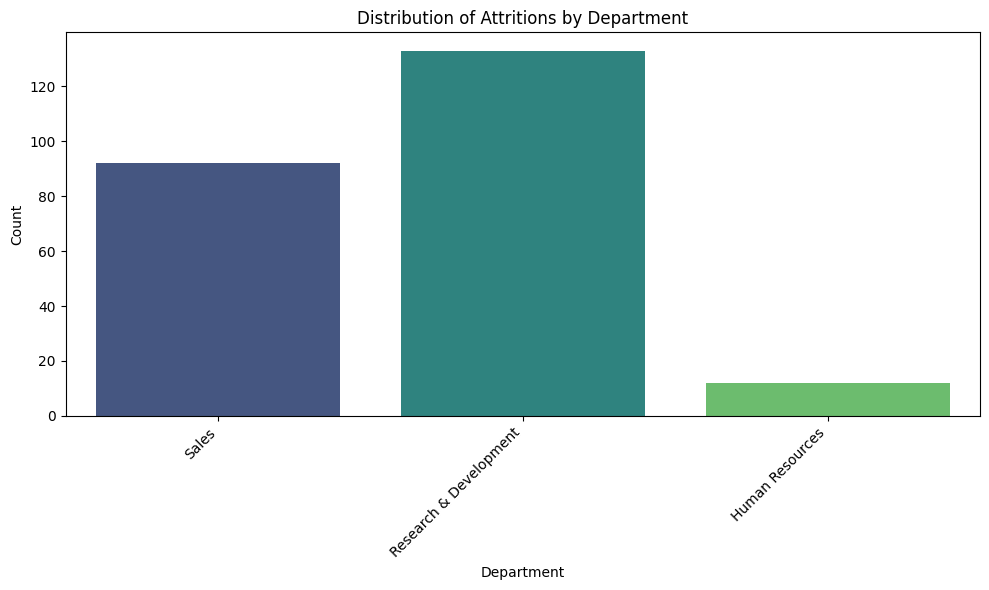

In [190]:
attrition_data = df[df['Attrition'] == 'Yes']

# Use seaborn.countplot to visualize the distribution of 'Department' for attrition data
plt.figure(figsize=(10, 6)) # You can adjust the figure size as needed
sns.countplot(data=attrition_data, x='Department', palette='viridis') # Using a palette for better visualization
plt.title('Distribution of Attritions by Department')
plt.xlabel('Department')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability if department names are long
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

In [191]:
attrition_by_job_role = attrition_data['JobRole'].value_counts()

# Display the job role with the most attritions
most_attritions_job_role = attrition_by_job_role.idxmax()
attritions_count = attrition_by_job_role.max()

print(f"The job role with the most attritions is '{most_attritions_job_role}' with {attritions_count} attritions.")


The job role with the most attritions is 'Laboratory Technician' with 62 attritions.


<ipython-input-192-bf3679e5f092>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=attrition_data, x='JobRole', palette='viridis') # Using a palette for better visualization


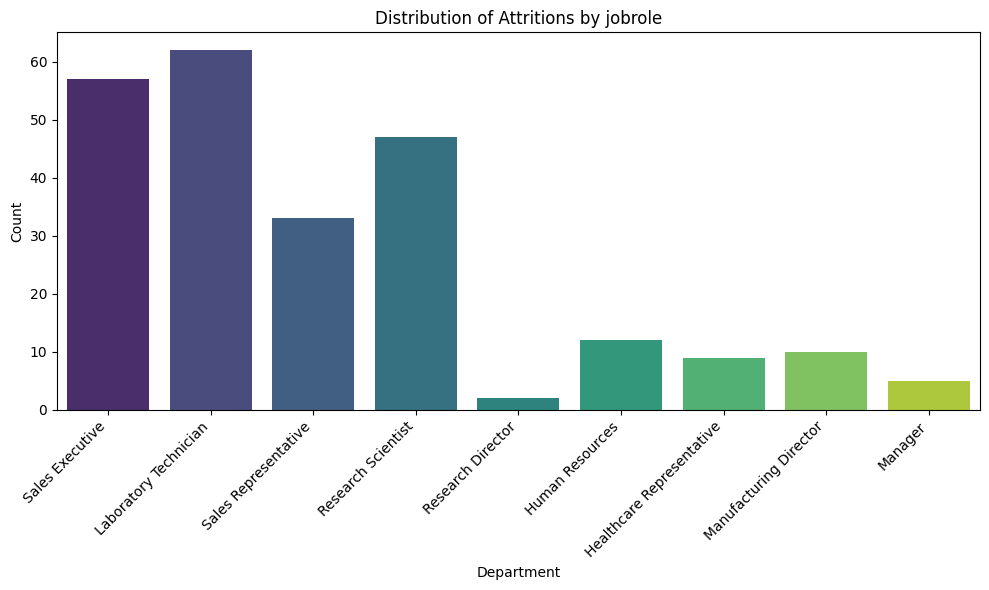

In [192]:
attrition_data = df[df['Attrition'] == 'Yes']

# Use seaborn.countplot to visualize the distribution of 'Department' for attrition data
plt.figure(figsize=(10, 6)) # You can adjust the figure size as needed
sns.countplot(data=attrition_data, x='JobRole', palette='viridis') # Using a palette for better visualization
plt.title('Distribution of Attritions by jobrole')
plt.xlabel('Department')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability if department names are long
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

## Multivariate Analysis

heat map used to discover the relationship between all num variables

strong positive rship between price and ssd, price and ram

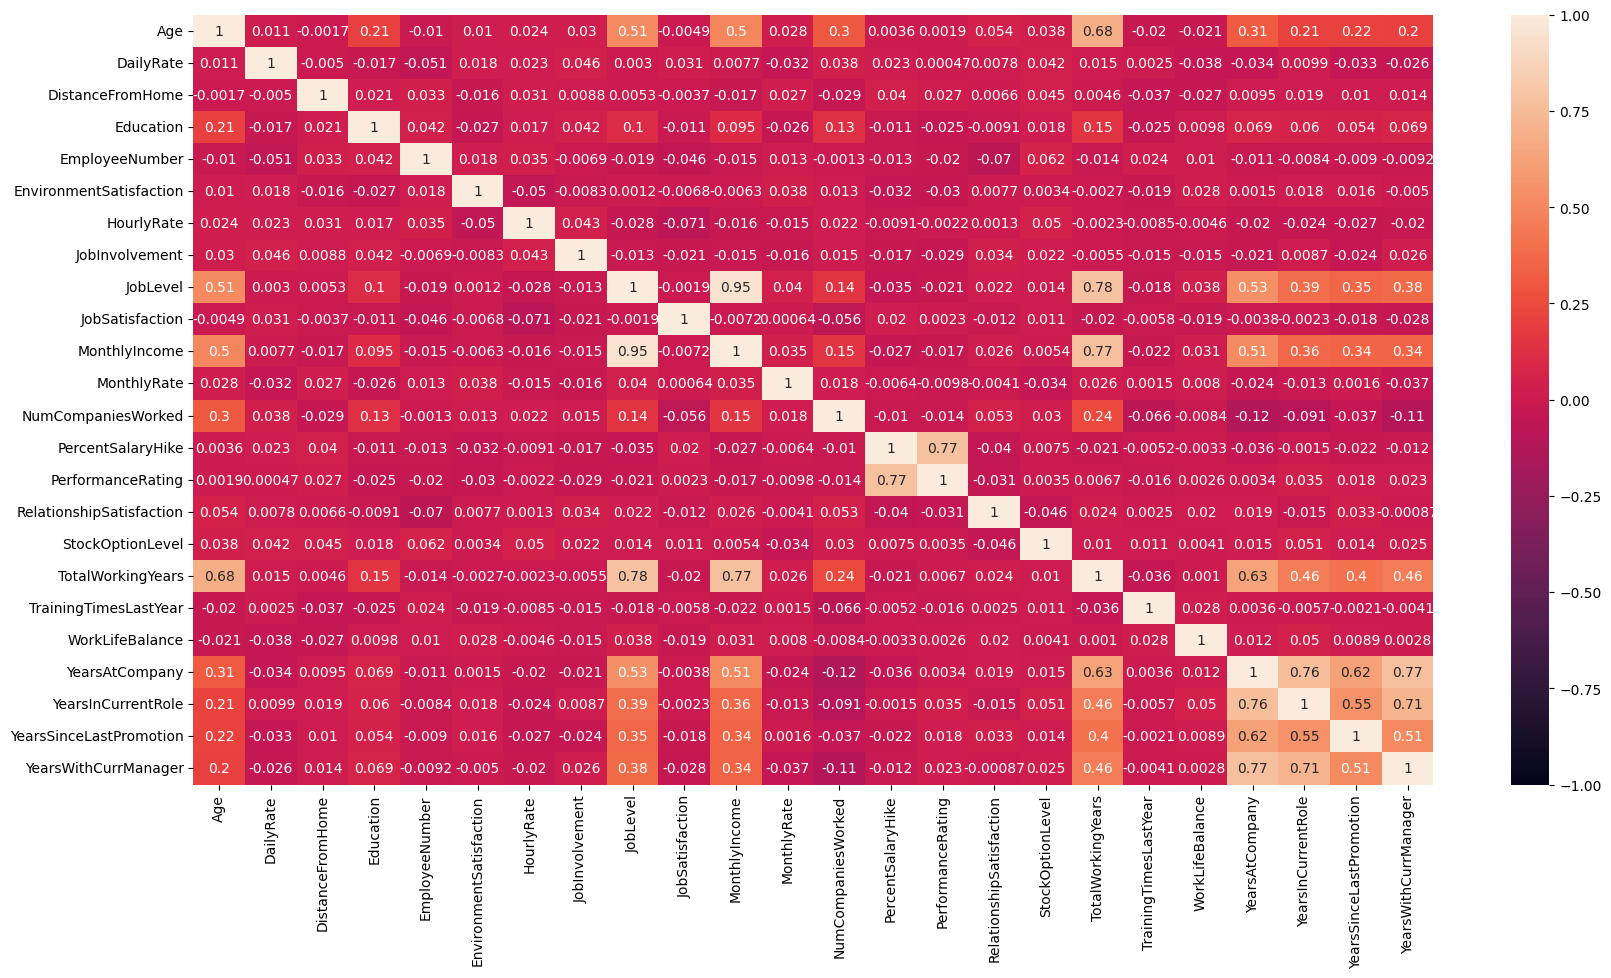

In [182]:
plt.figure(figsize= (20, 10))
sns.heatmap(data=num_col.corr(), annot=True, vmin=-1, vmax=1)
plt.show()

In [183]:
df.corr(numeric_only=True)

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,-0.010145,0.010146,0.024287,0.029820,0.509604,-0.004892,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,-0.050990,0.018355,0.023381,0.046135,0.002966,0.030571,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,0.032916,-0.016075,0.031131,0.008783,0.005303,-0.003669,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,0.042070,-0.027128,0.016775,0.042438,0.101589,-0.011296,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,1.000000,0.017621,0.035179,-0.006888,-0.018519,-0.046247,...,-0.020359,-0.069861,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,0.017621,1.000000,-0.049857,-0.008278,0.001212,-0.006784,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,0.035179,-0.049857,1.000000,0.042861,-0.027853,-0.071335,...,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,-0.006888,-0.008278,0.042861,1.000000,-0.012630,-0.021476,...,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,-0.018519,0.001212,-0.027853,-0.012630,1.000000,-0.001944,...,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281
JobSatisfaction,-0.004892,0.030571,-0.003669,-0.011296,-0.046247,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,...,0.002297,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656
